In [13]:
import tensorflow as tf


In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train , y_train),(x_test , y_test)= mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

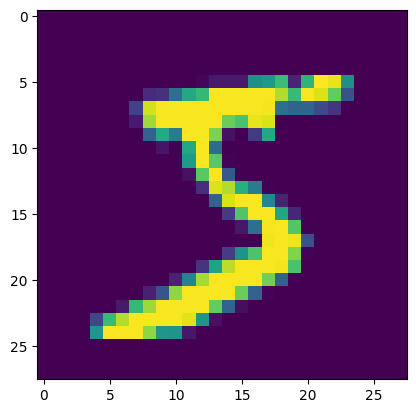

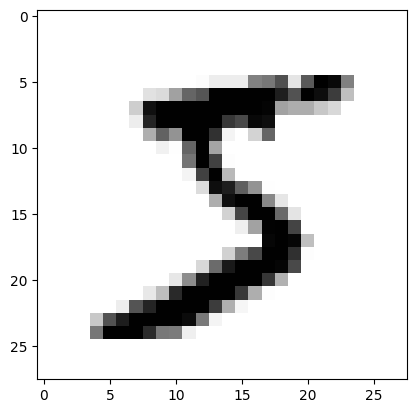

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

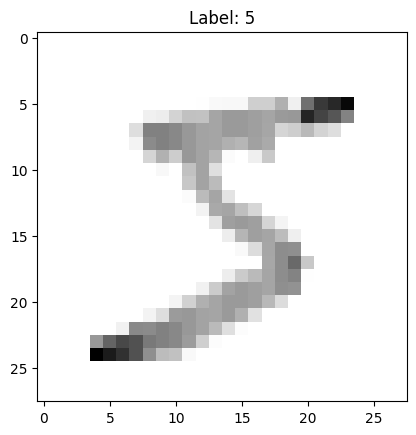

In [19]:
# Normalize the training and test data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Display the first image in the training set
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title(f"Label: {y_train[0]}")
plt.show()

In [21]:
print(y_train[0])

5


In [58]:
import numpy as np

IMG_SIZE = 28  # Image size

# Reshaping training and testing data
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Print shapes of the reshaped arrays
print("Training samples dimension:", x_trainr.shape)
print("Testing samples dimension:", x_testr.shape)

Training samples dimension: (60000, 28, 28, 1)
Testing samples dimension: (10000, 28, 28, 1)


from tensorflow.keras.models import sequencial
from tensorflow.keras.layers import Dense, Dropout , Activation , Flatten , Conv2D , MaxPooling2D

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [67]:
model = Sequential()

# Input Layer
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))  # Explicitly define the input shape

# First Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Optional: You can remove this if the spatial dimensions are too small

# Flatten the output for dense layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

# Output Layer
model.add(Dense(10))  # 10 output units for 10 classes (digits 0-9)
model.add(Activation("softmax"))  # Softmax activation for multi-class classification


In [69]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,994 (460.91 KB)

 Trainable params: 117,994 (460.91 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
print("total training samples", len(x_trainr))

total training samples 60000


In [81]:
model.compile(
    loss="sparse_categorical_crossentropy",  # Loss function for integer labels
    optimizer="adam",  # Adam optimizer
    metrics=["accuracy"]  # Track accuracy during training
)

In [75]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 143s 105ms/step - accuracy: 0.8220 - loss: 0.5398 - val_accuracy: 0.9662 - val_loss: 0.1164
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 168s 128ms/step - accuracy: 0.9747 - loss: 0.0831 - val_accuracy: 0.9815 - val_loss: 0.0654
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 182s 113ms/step - accuracy: 0.9835 - loss: 0.0515 - val_accuracy: 0.9770 - val_loss: 0.0795
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 119s 90ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9794 - val_loss: 0.0708
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 127s 97ms/step - accuracy: 0.9887 - loss: 0.0341 - val_accuracy: 0.9819 - val_loss: 0.0621


In [79]:
test_loss, test_acc = model.evaluate(x_testr , y_test)
print("test loss on 10000 test samples ",test_loss)
print("validation accuracy on 10000 test samples ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9813 - loss: 0.0673
test loss on 10000 test samples  0.05087195709347725
validation accuracy on 10000 test samples  0.98580002784729


In [83]:
 # Add batch dimension
predictions = model.predict([x_testr])


D:\tensorflow\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_462
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


D:\tensorflow\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_462
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [87]:
print(predictions)

[[2.5456073e-09 1.2496188e-05 2.8498576e-05 ... 9.9993503e-01
  3.4174960e-08 1.6054028e-05]
 [1.7190113e-04 4.7086676e-05 9.9976975e-01 ... 4.0160357e-06
  3.4121885e-07 2.5801878e-06]
 [1.4885004e-09 1.0000000e+00 3.5582852e-09 ... 5.3267613e-10
  3.8306629e-09 1.4464459e-09]
 ...
 [1.2242879e-10 2.9165001e-06 9.9437384e-06 ... 1.6872890e-04
  5.2686187e-04 6.1973587e-05]
 [2.8706688e-06 1.1407798e-07 8.1999694e-08 ... 2.6189134e-08
  6.6518791e-05 2.4819352e-05]
 [4.0893401e-06 1.6521349e-07 4.2761772e-06 ... 1.2140720e-07
  2.6788336e-04 6.6161729e-06]]


In [89]:
print(np.argmax(predictions[0]))

7


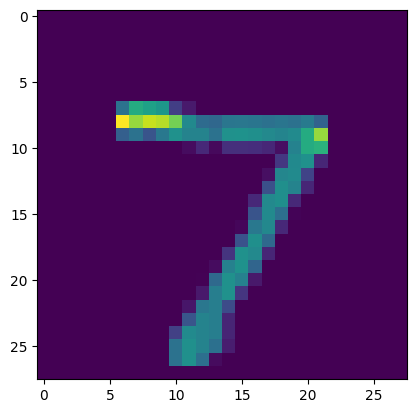

In [91]:
plt.imshow(x_test[0])

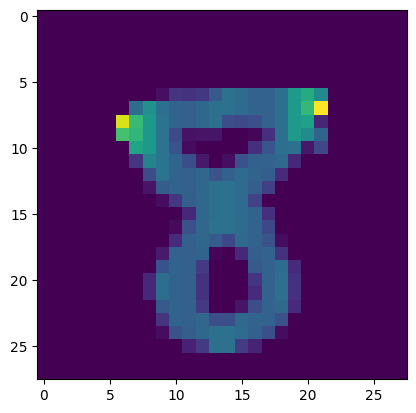

In [93]:
plt.imshow(x_test[128])

In [115]:
import cv2

In [117]:
img = cv2.imread("C:\\Users\\Mohaz\\Desktop\\checker.png")

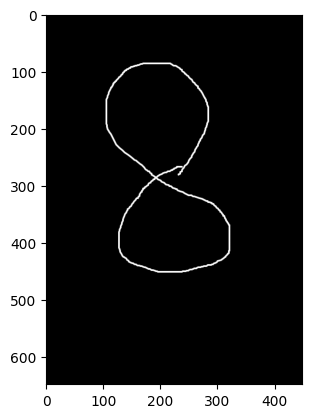

In [119]:
plt.imshow(img)

In [125]:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [127]:
resized = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)

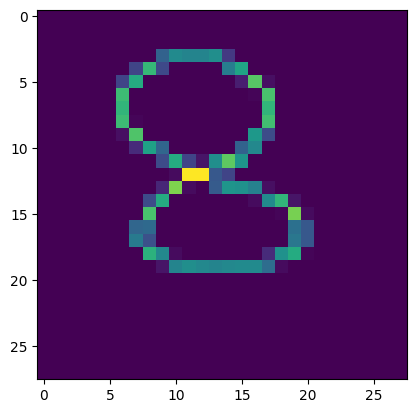

In [129]:
plt.imshow(resized)

In [131]:
newimg = tf.keras.utils.normalize(resized , axis=1)

In [133]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE , IMG_SIZE , 1)

In [135]:
newimg.shape

(1, 28, 28, 1)

In [137]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


In [139]:
print(np.argmax(predictions))

8
